# Clustering Mobilephone Sales

### Project Overview

This project aims to cluster a dataset comprising product attributes such as brand, type, storage capacity, warranty, price, incoming, outgoing, and remaining stock. Utilizing K-means clustering, the analysis involves preprocessing steps to handle missing data, encoding categorical variables, and scaling features. Following exploratory data analysis to understand feature distributions and correlations, the dataset undergoes clustering to identify natural groupings of products based on their attributes. Optimal cluster number determination is guided by silhouette score and Davies-Bouldin score, with cluster visualization facilitated by silhouette plots. Through interpretation of the resulting clusters, insights into product segmentation and patterns are derived, enabling the formulation of actionable recommendations based on clustering outcomes. The libraries employed include numpy, pandas, scikit-learn, scipy, and yellowbrick for data manipulation, preprocessing, clustering, evaluation, and visualization, respectively.

### Import Libraries

In [1]:
# Utilities
import numpy as np
import pandas as pd

# Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import skew, boxcox
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.metrics.cluster import contingency_matrix
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
    
import warnings
warnings.filterwarnings("ignore")

### Dataset Input

In [2]:
df = pd.read_excel('./DATAASLI.xlsx')

In [3]:
df.head()

,No,Kode Barang,Merk,Type,Penyimpanan,Garansi,Harga,Barang Masuk,Barang Keluar,Stok Barang
0,1,XI9A32,Xiaomi,9A,32,Resmi,1330000,30,18,12
1,2,XI9C32,Xiaomi,9C,32,Resmi,1400000,23,12,11
2,3,XI9C64,Xiaomi,9C,64,Resmi,1650000,27,17,10
3,4,XINO764,Xiaomi,Note 7,64,Resmi,2261000,11,7,4
4,5,XINO832,Xiaomi,Note 8,32,Resmi,2100000,12,6,6


The dataset contains the following columns:
* No: Unique identifier for each product.
* Kode Barang: Product code.
* Merk: Brand of the product.
* Type: Type or model of the product.
* Penyimpanan: Storage capacity of the product.
* Garansi: Warranty information for the product.
* Harga: Price of the product.
* Barang Masuk: Quantity of the product entered.
* Barang Keluar: Quantity of the product sold.
* Stok Barang: Remaining stock of the product.

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
No,100.0,50.50,29.011492,1.0,25.75,50.5,75.25,100.0
Penyimpanan,100.0,68.33,38.733499,1.0,32.00,64.0,127.25,128.0
Harga,100.0,2128670.00,844216.929073,205000.0,1550000.00,1942500.0,2448750.00,4800000.0
Barang Masuk,100.0,14.38,5.859948,5.0,10.00,14.0,18.00,30.0
Barang Keluar,100.0,8.95,5.145116,2.0,5.00,7.0,11.25,25.0
Stok Barang,100.0,5.43,2.720127,2.0,3.00,5.0,7.00,14.0


In [5]:
df.isna().sum()

No               0
Kode Barang      0
Merk             0
Type             0
Penyimpanan      0
Garansi          0
Harga            0
Barang Masuk     0
Barang Keluar    0
Stok Barang      0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.drop('No',inplace=True,axis=1)

In [8]:
df.head()

,Kode Barang,Merk,Type,Penyimpanan,Garansi,Harga,Barang Masuk,Barang Keluar,Stok Barang
0,XI9A32,Xiaomi,9A,32,Resmi,1330000,30,18,12
1,XI9C32,Xiaomi,9C,32,Resmi,1400000,23,12,11
2,XI9C64,Xiaomi,9C,64,Resmi,1650000,27,17,10
3,XINO764,Xiaomi,Note 7,64,Resmi,2261000,11,7,4
4,XINO832,Xiaomi,Note 8,32,Resmi,2100000,12,6,6


Based on the provided descriptive statistics, we can draw the following conclusions about the dataset:

* Penyimpanan (Storage): The storage capacity of the products ranges from 1 to 128, with an average capacity of 68.33 and a standard deviation of 38.73. The majority of products have a storage capacity between 32 and 127.25.
* Harga (Price): The prices of the products vary widely, with a minimum price of 205,000 and a maximum price of 4,800,000. The average price is 2,128,670, with a standard deviation of 844,216.93.
* Barang Masuk (Incoming Stock): The average quantity of products entering stock is 14.38, with a standard deviation of 5.86. The range of incoming stock is from 5 to 30 units.
* Barang Keluar (Outgoing Stock): The average quantity of products sold is 8.95, with a standard deviation of 5.15. The range of outgoing stock is from 2 to 25 units.
* Stok Barang (Remaining Stock): The average remaining stock is 5.43, with a standard deviation of 2.72. The range of remaining stock is from 2 to 14 units.

### EDA

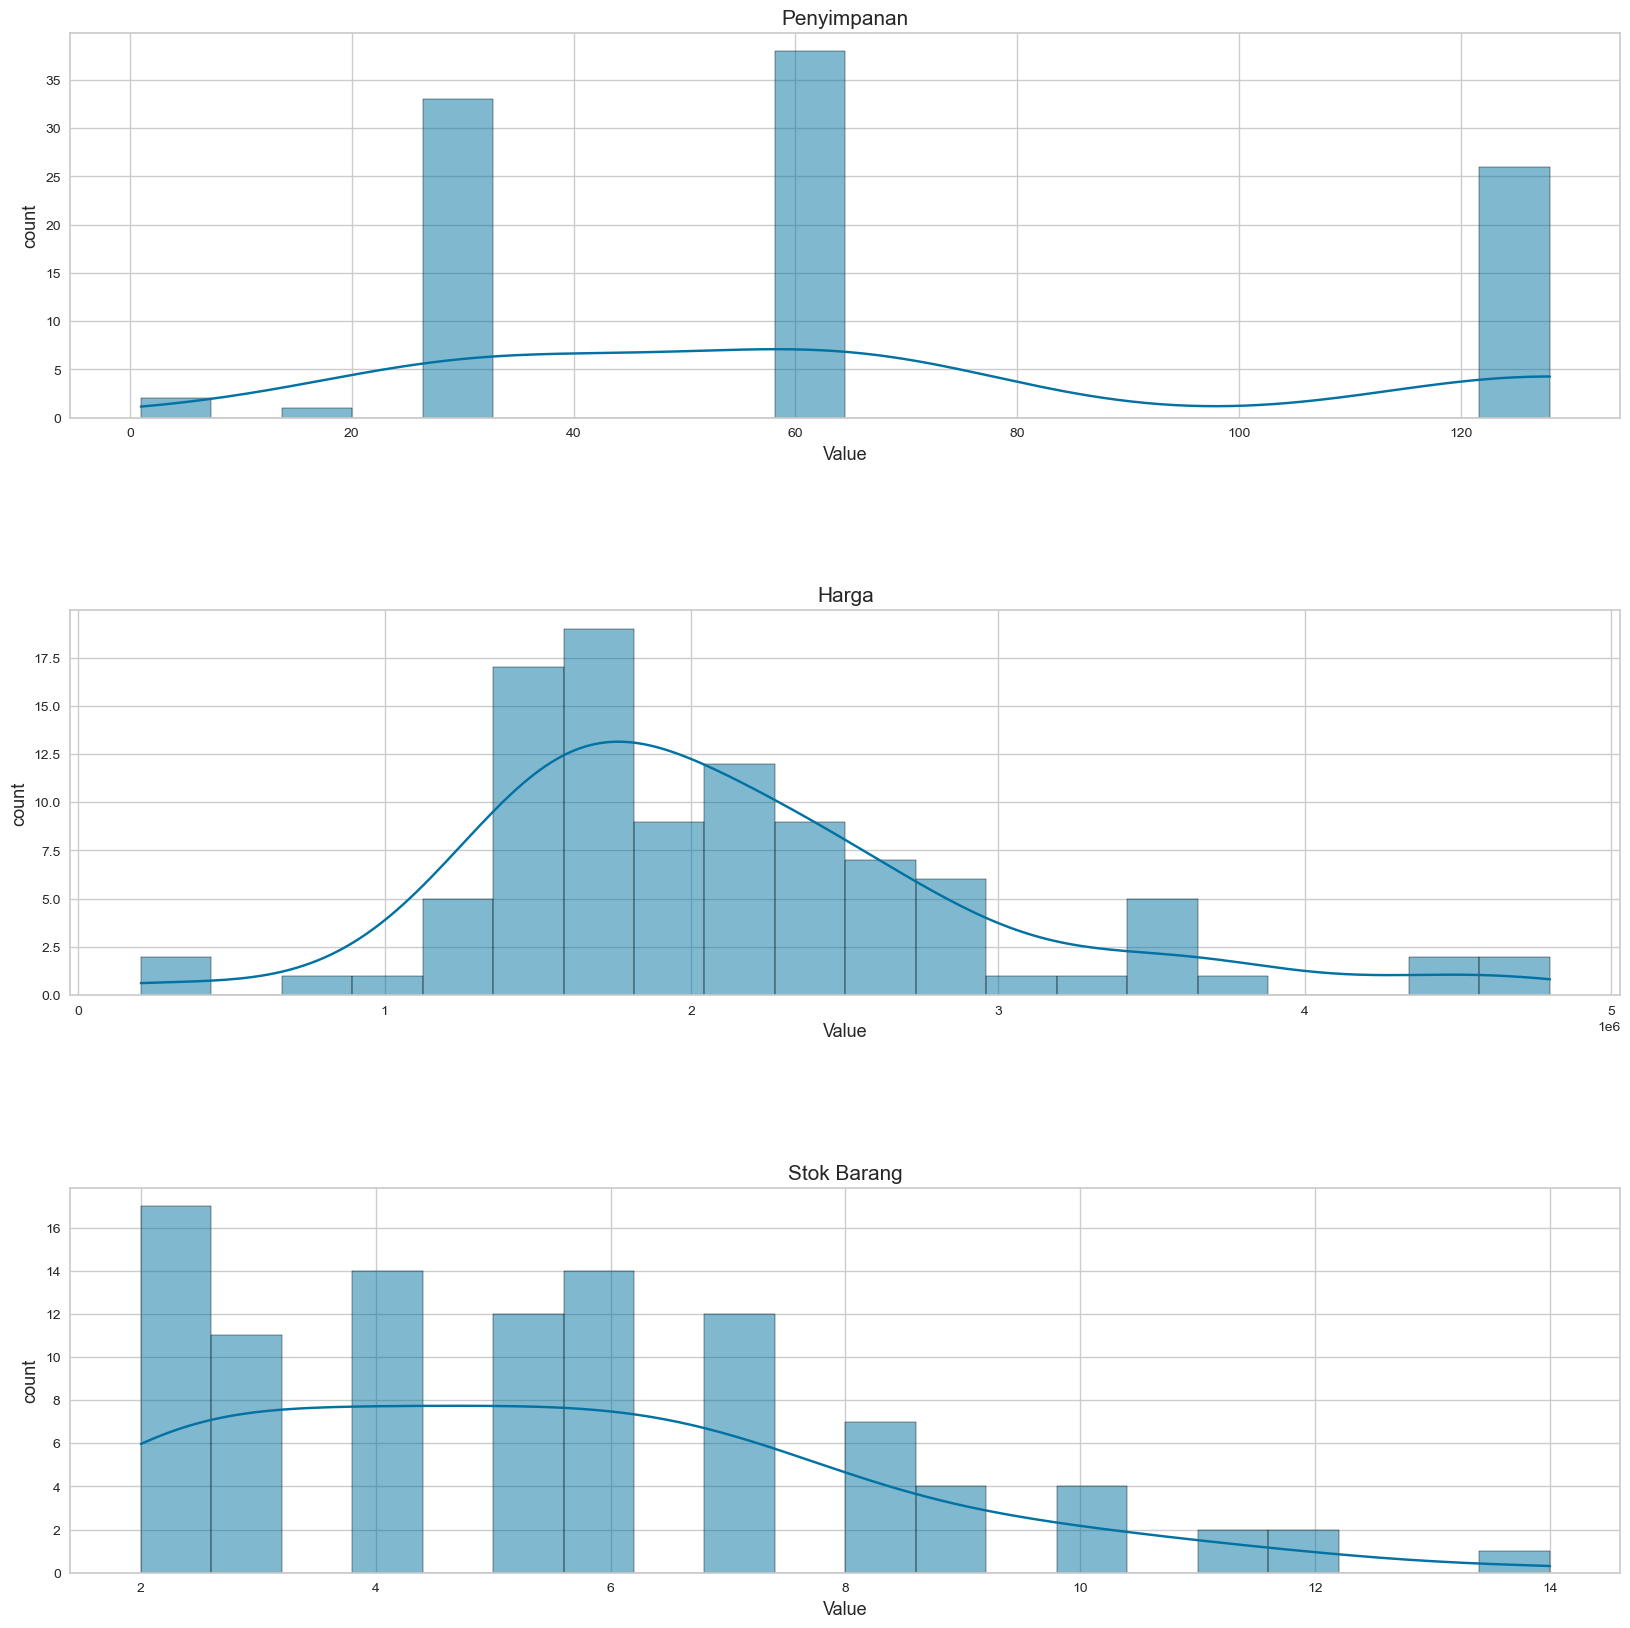

In [9]:
var_col = ['Penyimpanan','Harga','Stok Barang']
plt.figure(figsize=(20,20))
for i, col in enumerate(var_col):
    plt.subplot(3,1,i+1)
    plt.title(col, fontsize=15)
    plt.xlabel("Value", fontsize=13)
    plt.ylabel("count", fontsize=13)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.histplot(data=df, x=col, bins=20, kde=True)

In [10]:
df['Merk'].unique()

array(['Xiaomi', 'Samsung', 'Oppo', 'Realme', 'Vivo', 'Infinix', 'Nokia',
       'Meizu'], dtype=object)

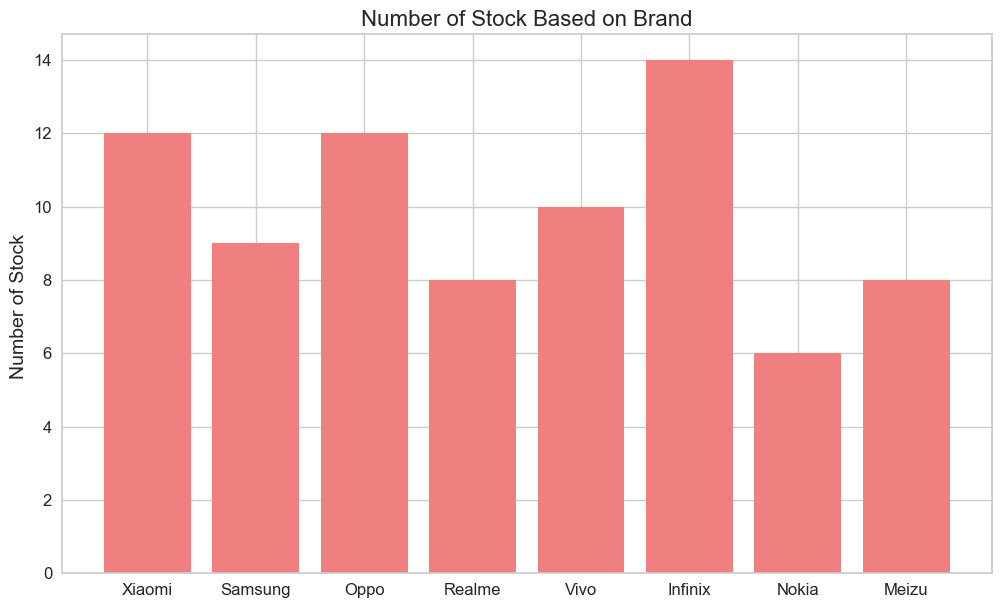

In [11]:
plt.figure(figsize=(12,7))
plt.bar(df['Merk'],df['Stok Barang'] , color='lightcoral')

plt.title('Number of Stock Based on Brand', size=16)
plt.ylabel('Number of Stock ', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

In [12]:
new_df = df[['Penyimpanan','Harga','Barang Masuk','Barang Keluar','Stok Barang']]

In [13]:
new_df.head()

,Penyimpanan,Harga,Barang Masuk,Barang Keluar,Stok Barang
0,32,1330000,30,18,12
1,32,1400000,23,12,11
2,64,1650000,27,17,10
3,64,2261000,11,7,4
4,32,2100000,12,6,6


### Preprocessing

In [14]:
SS_scaler = pd.DataFrame(StandardScaler().fit_transform(new_df), columns=new_df.columns)

In [15]:
SS_scaler

,Penyimpanan,Harga,Barang Masuk,Barang Keluar,Stok Barang
0,-0.942673,-0.950814,2.678981,1.767811,2.427496
1,-0.942673,-0.867480,1.478413,0.595782,2.058014
2,-0.112353,-0.569855,2.164452,1.572473,1.688532
3,-0.112353,0.157538,-0.579703,-0.380910,-0.528359
4,-0.942673,-0.034132,-0.408193,-0.576248,0.210605
...,...,...,...,...,...
95,1.548288,-0.272231,0.106336,0.205105,-0.158877
96,-0.942673,-0.688905,1.992943,2.353825,-0.158877
97,-0.112353,-0.569855,1.306904,1.181796,0.580087
98,-1.747046,-2.274647,1.992943,2.158487,0.210605


### Kmeans Sklearn

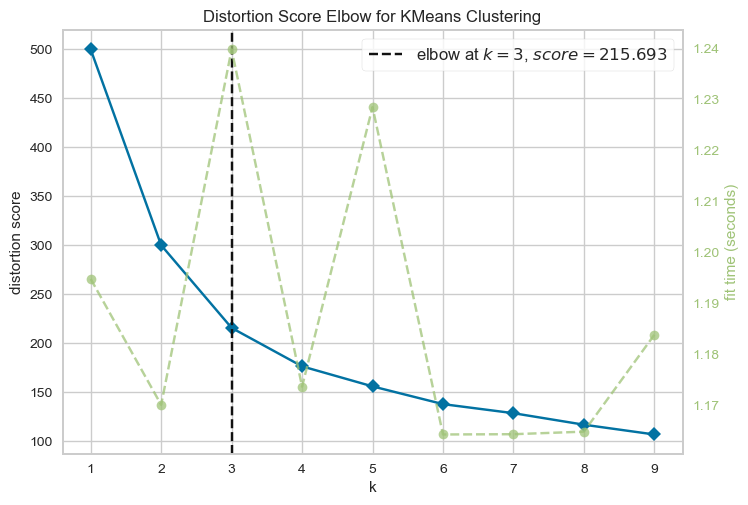

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
model1 = KMeans(random_state=42)
visualizer_SS = KElbowVisualizer(model1, k=(1,10))
visualizer_SS.fit(SS_scaler)
visualizer_SS.show()

In [17]:
wcss = []
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(SS_scaler)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [18]:
wcss

[500.00000000000006,
 300.3251532326175,
 215.69324974452732,
 176.59097642750754,
 156.1562562359258,
 138.11418820979767,
 125.25822934747609,
 114.20150835267589,
 107.92980498098848]

In [19]:
visualizer_SS.elbow_value_

3

In [20]:
model_Kmeans_SS = KMeans(visualizer_SS.elbow_value_, random_state=42)
labels_SS = model_Kmeans_SS.fit_predict(SS_scaler)

In [21]:
SS_scaler['label'] = labels_SS
SS_scaler

,Penyimpanan,Harga,Barang Masuk,Barang Keluar,Stok Barang,label
0,-0.942673,-0.950814,2.678981,1.767811,2.427496,0
1,-0.942673,-0.867480,1.478413,0.595782,2.058014,0
2,-0.112353,-0.569855,2.164452,1.572473,1.688532,0
3,-0.112353,0.157538,-0.579703,-0.380910,-0.528359,2
4,-0.942673,-0.034132,-0.408193,-0.576248,0.210605,2
...,...,...,...,...,...,...
95,1.548288,-0.272231,0.106336,0.205105,-0.158877,1
96,-0.942673,-0.688905,1.992943,2.353825,-0.158877,0
97,-0.112353,-0.569855,1.306904,1.181796,0.580087,0
98,-1.747046,-2.274647,1.992943,2.158487,0.210605,0


### Evaluation

In [22]:
print("=========================using StandardScaler============================")
print(f'Davies-Bouldin index = {davies_bouldin_score(SS_scaler, labels_SS)}')
print(f'Silhouette Score     = {silhouette_score(SS_scaler, labels_SS)}')
print("========================================================================\n")

=========================using StandardScaler============================
Davies-Bouldin index = 0.9168299110262531
Silhouette Score     = 0.41207812687576073



In [23]:
df['label'] = labels_SS
df

,Kode Barang,Merk,Type,Penyimpanan,Garansi,Harga,Barang Masuk,Barang Keluar,Stok Barang,label
0,XI9A32,Xiaomi,9A,32,Resmi,1330000,30,18,12,0
1,XI9C32,Xiaomi,9C,32,Resmi,1400000,23,12,11,0
2,XI9C64,Xiaomi,9C,64,Resmi,1650000,27,17,10,0
3,XINO764,Xiaomi,Note 7,64,Resmi,2261000,11,7,4,2
4,XINO832,Xiaomi,Note 8,32,Resmi,2100000,12,6,6,2
...,...,...,...,...,...,...,...,...,...,...
95,INHO10S128,Infinix,Hot 10S,128,Resmi,1900000,15,10,5,1
96,INHO11P32,Infinix,Hot 11 Play,32,Resmi,1550000,26,21,5,0
97,INHO11P64,Infinix,Hot 11 Play,64,Resmi,1650000,22,15,7,0
98,NO1051,Nokia,Nokia 105,1,Resmi,218000,26,20,6,0


In [24]:
df['label'].unique()

array([0, 2, 1])

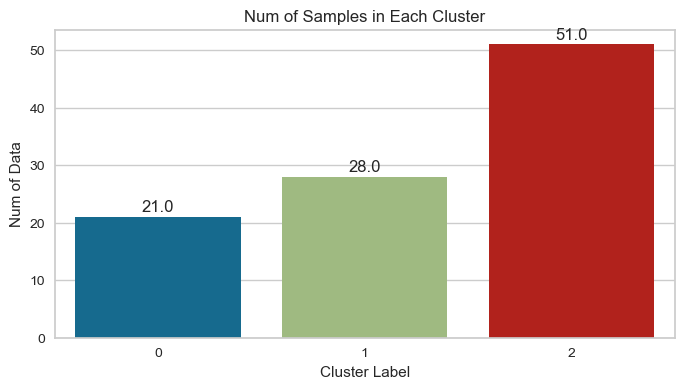

In [25]:
x = pd.Series(SS_scaler.label).value_counts().sort_index().reset_index()
x.columns = ['Cluster Label', 'Num of Data']
plt.figure(figsize=(8,4))
plt.title("Num of Samples in Each Cluster")
ax = sns.barplot(data=x, x='Cluster Label', y='Num of Data')
for i in ax.patches:
        ax.annotate(format(i.get_height()), (i.get_x() + i.get_width()/2.,i.get_height()),
               ha='center',va='center',xytext=(0,7), textcoords='offset points')

In [26]:
cluster0 = df[df['label']==0]
cluster0

,Kode Barang,Merk,Type,Penyimpanan,Garansi,Harga,Barang Masuk,Barang Keluar,Stok Barang,label
0,XI9A32,Xiaomi,9A,32,Resmi,1330000,30,18,12,0
1,XI9C32,Xiaomi,9C,32,Resmi,1400000,23,12,11,0
2,XI9C64,Xiaomi,9C,64,Resmi,1650000,27,17,10,0
17,XIRE1064,Xiaomi,Redmi 10,64,Resmi,2200000,21,14,7,0
22,SAA10S32,Samsung,A10S,32,Resmi,1550000,19,15,4,0
38,SAKEY1,Samsung,Keystone,1,Resmi,205000,20,13,7,0
46,OPA1532,Oppo,A15,32,Distributor,1800000,18,14,4,0
61,REC232,Realme,C2,32,Resmi,1425000,20,18,2,0
63,REC1132,Realme,C11,32,Resmi,1475000,21,15,6,0
65,REC25Y64,Realme,C25Y,64,Resmi,1800000,25,19,6,0


In [27]:
cluster1 = df[df['label']==1]
cluster1

,Kode Barang,Merk,Type,Penyimpanan,Garansi,Harga,Barang Masuk,Barang Keluar,Stok Barang,label
6,XINO8128,Xiaomi,Note 8,128,Resmi,3500000,8,6,2,1
8,XINO9128,Xiaomi,Note 9,128,Resmi,2425000,9,7,2,1
11,XINO10S128,Xiaomi,Note 10S,128,Resmi,2900000,13,11,2,1
13,XIPOX3128,Xiaomi,Poco X3,128,Resmi,3650000,6,3,3,1
18,XIRE10128,Xiaomi,Redmi 10,128,Resmi,2400000,12,7,5,1
29,SAA51128,Samsung,A51,128,Resmi,4600000,7,3,4,1
30,SAA52128,Samsung,A52,128,Resmi,4800000,7,5,2,1
34,SAM2164,Samsung,M21,64,Resmi,2580000,8,5,3,1
36,SAM30S64,Samsung,M30S,64,Resmi,2850000,6,2,4,1
37,SAM31128,Samsung,M31,128,Resmi,3636000,12,6,6,1


In [28]:
cluster2 = df[df['label']==2]
cluster2

,Kode Barang,Merk,Type,Penyimpanan,Garansi,Harga,Barang Masuk,Barang Keluar,Stok Barang,label
3,XINO764,Xiaomi,Note 7,64,Resmi,2261000,11,7,4,2
4,XINO832,Xiaomi,Note 8,32,Resmi,2100000,12,6,6,2
5,XINO864,Xiaomi,Note 8,64,Resmi,2300000,15,10,5,2
7,XINO964,Xiaomi,Note 9,64,Resmi,2150000,13,5,8,2
9,XINO1064,Xiaomi,Note 10,64,Resmi,2400000,16,9,7,2
10,XINO10S64,Xiaomi,Note 10S,64,Resmi,2750000,11,5,6,2
12,XIPOM364,Xiaomi,Poco M3,64,Resmi,2100000,18,11,7,2
14,XIRE7A32,Xiaomi,Redmi 7A,32,Resmi,1125000,12,9,3,2
15,XIRE932,Xiaomi,Redmi 9,32,Resmi,1775000,15,6,9,2
16,XIRE964,Xiaomi,Redmi 9,64,Resmi,1850000,10,8,2,2


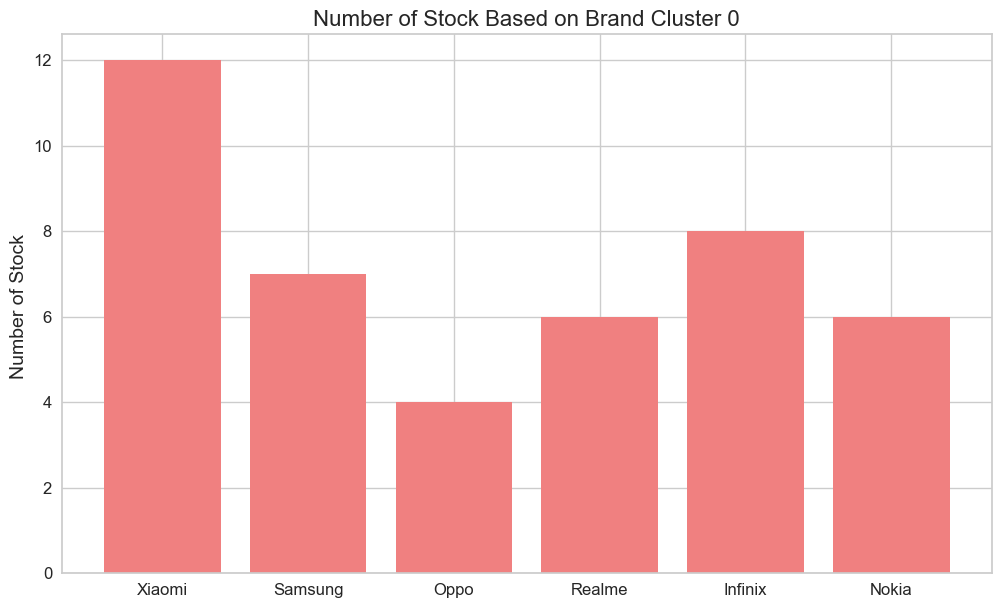

In [29]:
plt.figure(figsize=(12,7))
plt.bar(cluster0['Merk'],cluster0['Stok Barang'] , color='lightcoral')

plt.title('Number of Stock Based on Brand Cluster 0', size=16)
plt.ylabel('Number of Stock ', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

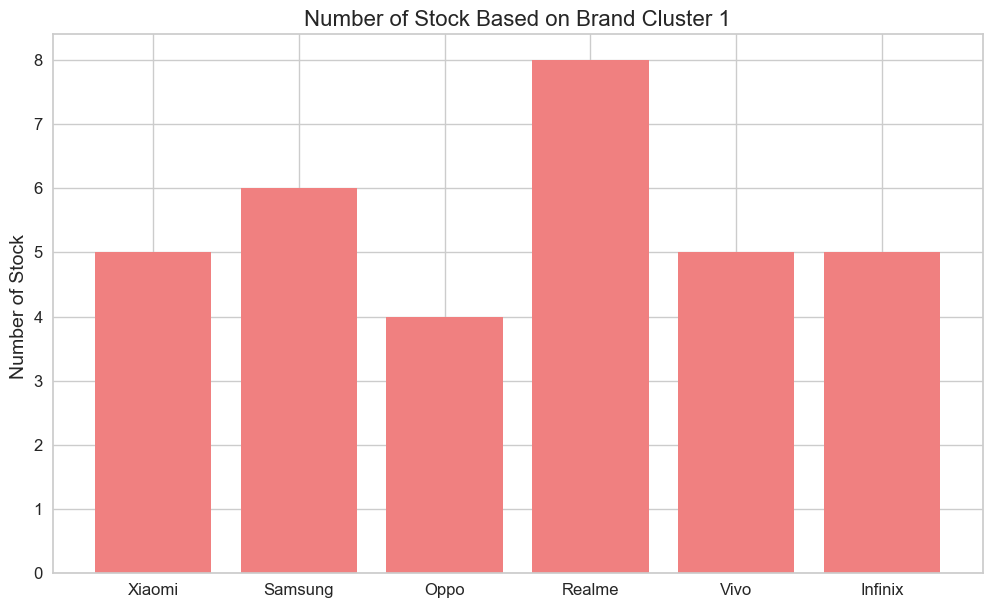

In [30]:
plt.figure(figsize=(12,7))
plt.bar(cluster1['Merk'],cluster1['Stok Barang'] , color='lightcoral')

plt.title('Number of Stock Based on Brand Cluster 1', size=16)
plt.ylabel('Number of Stock ', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

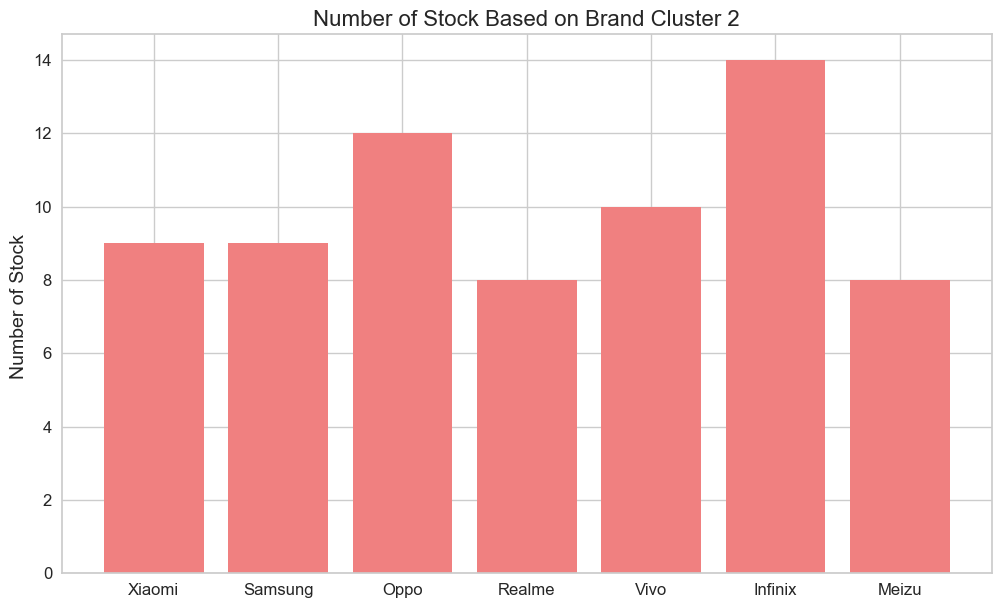

In [31]:
plt.figure(figsize=(12,7))
plt.bar(cluster2['Merk'],cluster2['Stok Barang'] , color='lightcoral')

plt.title('Number of Stock Based on Brand Cluster 2', size=16)
plt.ylabel('Number of Stock ', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

In [32]:
new_df['label']=labels_SS

In [33]:
new_df.head()

,Penyimpanan,Harga,Barang Masuk,Barang Keluar,Stok Barang,label
0,32,1330000,30,18,12,0
1,32,1400000,23,12,11,0
2,64,1650000,27,17,10,0
3,64,2261000,11,7,4,2
4,32,2100000,12,6,6,2


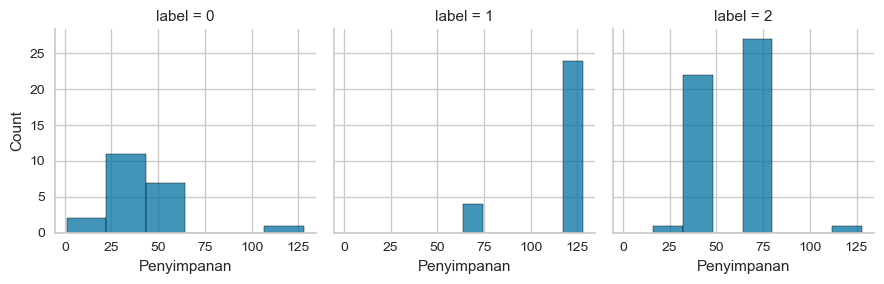

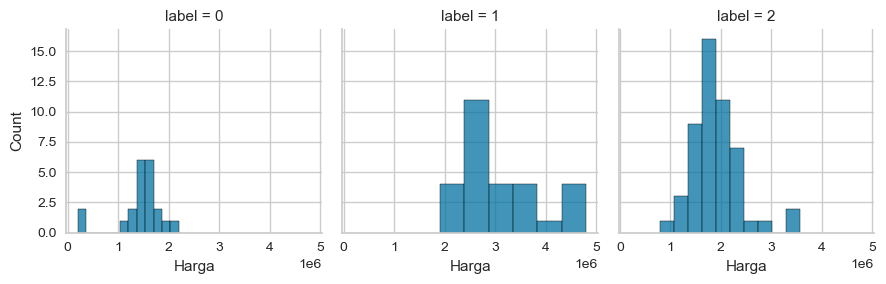

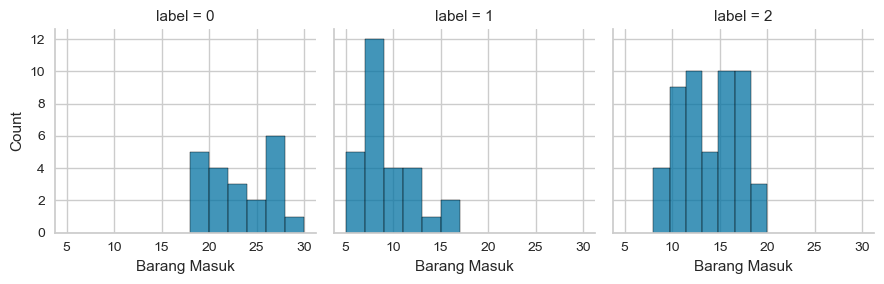

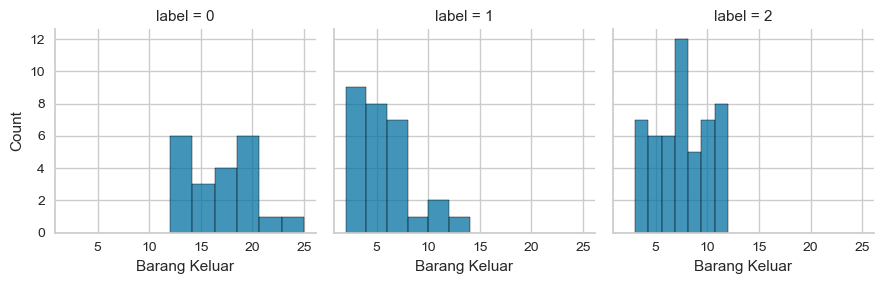

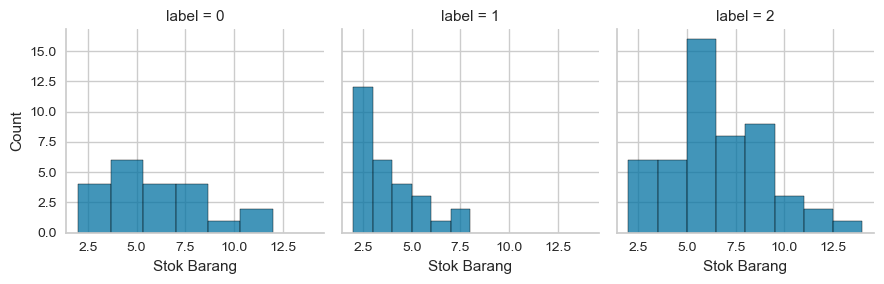

In [34]:
for x in new_df.drop('label', axis=1).columns:
    plot = sns.FacetGrid(new_df, col='label')
    plot.map(sns.histplot, x)

In [35]:
df['label'].value_counts()

label
2    51
1    28
0    21
Name: count, dtype: int64

### KMeans Pycluster - Euclidean Vs Manhattan

In [36]:
SS_scaler = pd.DataFrame(StandardScaler().fit_transform(new_df), columns=new_df.columns)

In [37]:
X = SS_scaler.iloc[:, 0:5].values # feature matrix
y = SS_scaler.iloc[:, -1].values # class matrix

In [38]:
distance_measures = {'euclidean': 0, 'squared euclidean': 1, 'manhattan': 2, 'chebyshev': 3,
                    'canberra': 5, 'chi-square': 6}

#### Euclidean

In [39]:
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import distance_metric
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.encoder import type_encoding
from pyclustering.cluster.encoder import cluster_encoder

In [40]:
initial_centers = random_center_initializer(X, 3, random_state=24).initialize()
# instance created for respective distance metric
instanceKm = kmeans(X, initial_centers=initial_centers, metric=distance_metric(distance_measures['euclidean']), random_state=24)
# perform cluster analysis
instanceKm.process()
# cluster analysis results - clusters and centers
pyClusters = instanceKm.get_clusters()
pyCenters = instanceKm.get_centers()
# enumerate encoding type to index labeling to get labels
pyEncoding = instanceKm.get_cluster_encoding()
pyEncoder = cluster_encoder(pyEncoding, pyClusters, X)
pyLabels = pyEncoder.set_encoding(0).get_clusters()
SS_scaler['label'] = pyLabels

db_index = davies_bouldin_score(SS_scaler, pyLabels)
print("euclidean - davies bouldin: ", db_index)

s_index = silhouette_score(SS_scaler, pyLabels)
print("euclidean - silhoutte: ", s_index)

euclidean - davies bouldin:  0.916829911026253
euclidean - silhoutte:  0.4120781268757607


In [41]:
db_index = []
s_index = []

for K in range(2,11):
  initial_centers = random_center_initializer(X, K, random_state=24).initialize()
  # instance created for respective distance metric
  instanceKm = kmeans(X, initial_centers=initial_centers, metric=distance_metric(distance_measures['euclidean']))
  # perform cluster analysis
  instanceKm.process()
  # cluster analysis results - clusters and centers
  pyClusters = instanceKm.get_clusters()
  pyCenters = instanceKm.get_centers()
  # enumerate encoding type to index labeling to get labels
  pyEncoding = instanceKm.get_cluster_encoding()
  pyEncoder = cluster_encoder(pyEncoding, pyClusters, X)
  pyLabels = pyEncoder.set_encoding(0).get_clusters()
  SS_scaler

  db_index.append(davies_bouldin_score(SS_scaler, pyLabels))
  s_index.append(silhouette_score(SS_scaler, pyLabels))

##### Davies Bouldin Score

In [42]:
db_index

[1.1666928037147646,
 0.916829911026253,
 1.0978242100236753,
 1.222480056494684,
 1.2675698597605434,
 1.2491219135321245,
 1.291212065071211,
 1.2609808009077583,
 1.2258088503200562]

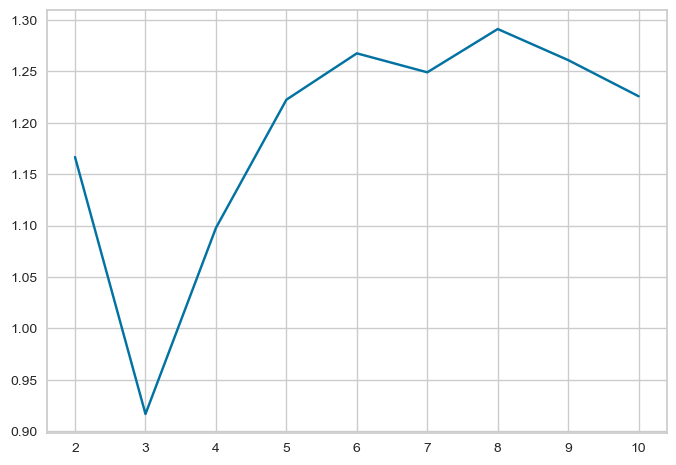

In [43]:
plt.plot(range(2,11), db_index)

##### Silhouette Score

In [44]:
s_index

[0.3145633685461691,
 0.4120781268757607,
 0.3222943258238178,
 0.28039374643981374,
 0.22466031610610301,
 0.21653877720188344,
 0.20658659057352138,
 0.22533446465605006,
 0.21423855940041464]

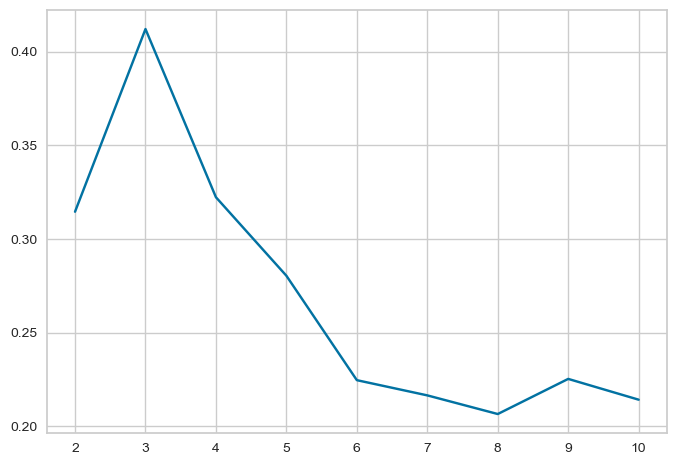

In [45]:
plt.plot(range(2,11), s_index)

#### Manhattan

In [46]:
initial_centers = random_center_initializer(X, 3, random_state=24).initialize()
# instance created for respective distance metric
instanceKm = kmeans(X, initial_centers=initial_centers, metric=distance_metric(distance_measures['manhattan']))
# perform cluster analysis
instanceKm.process()
# cluster analysis results - clusters and centers
pyClusters = instanceKm.get_clusters()
pyCenters = instanceKm.get_centers()
# enumerate encoding type to index labeling to get labels
pyEncoding = instanceKm.get_cluster_encoding()
pyEncoder = cluster_encoder(pyEncoding, pyClusters, X)
pyLabels = pyEncoder.set_encoding(0).get_clusters()
SS_scaler['label'] = pyLabels

db_index = davies_bouldin_score(SS_scaler, pyLabels)
print("manhattan - davies bouldin: ", db_index)

s_index = silhouette_score(SS_scaler, pyLabels)
print("manhattan - silhoutte: ", s_index)

manhattan - davies bouldin:  0.9515531189917853
manhattan - silhoutte:  0.3985944383920237


In [47]:
db_index = []
s_index = []

for K in range(2,11):
  initial_centers = random_center_initializer(X, K, random_state=24).initialize()
  # instance created for respective distance metric
  instanceKm = kmeans(X, initial_centers=initial_centers, metric=distance_metric(distance_measures['manhattan']))
  # perform cluster analysis
  instanceKm.process()
  # cluster analysis results - clusters and centers
  pyClusters = instanceKm.get_clusters()
  pyCenters = instanceKm.get_centers()
  # enumerate encoding type to index labeling to get labels
  pyEncoding = instanceKm.get_cluster_encoding()
  pyEncoder = cluster_encoder(pyEncoding, pyClusters, X)
  pyLabels = pyEncoder.set_encoding(0).get_clusters()
  SS_scaler['label'] = pyLabels

  db_index.append(davies_bouldin_score(SS_scaler, pyLabels))
  s_index.append(silhouette_score(SS_scaler, pyLabels))

##### Davies Bouldin Score

In [48]:
db_index

[1.0483521516702212,
 0.9515531189917853,
 0.8465385571004276,
 0.944806049811436,
 1.0075977209729967,
 0.8624983989495301,
 0.8487570853459689,
 0.7864995109356487,
 0.7351150563787329]

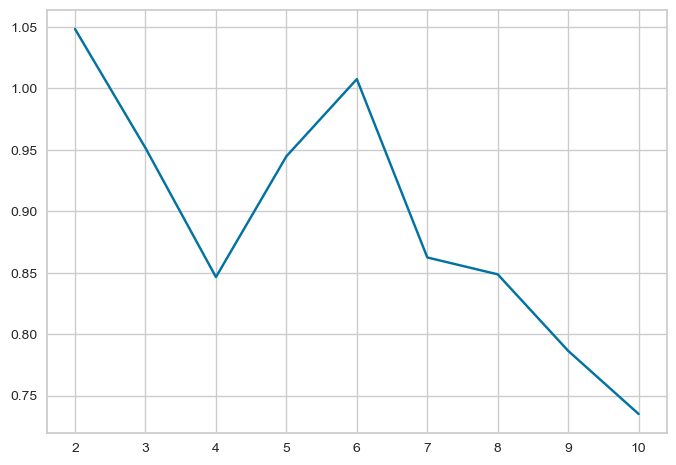

In [49]:
plt.plot(range(2,11), db_index)

##### Silhouette Score

In [50]:
s_index

[0.36715703051860954,
 0.3985944383920237,
 0.4498885599829096,
 0.3938352437908507,
 0.3921748548065784,
 0.4525447844259996,
 0.45574241786911157,
 0.4823329245819005,
 0.5058888770606701]

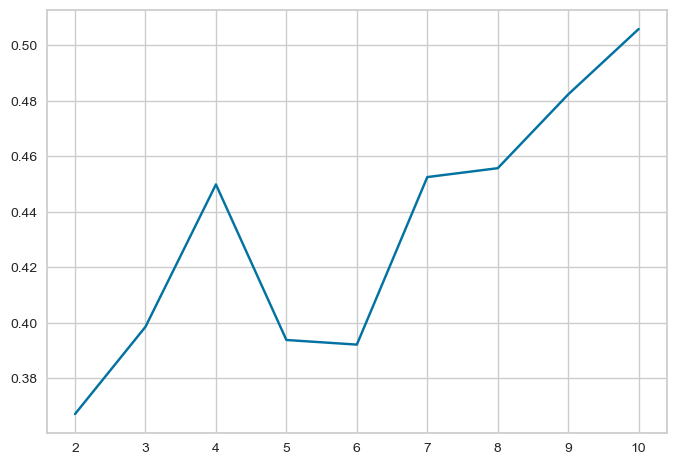

In [51]:
plt.plot(range(2,11), s_index)

### Conclusion

The analysis of mobile phone products based on their attributes such as price, storage capacity, and stock levels has revealed distinct clusters that can be leveraged for market segmentation and targeted marketing strategies.

* Cluster 0 represents a group of mobile phone products characterized by moderate prices, moderate storage capacity, and varying stock levels. These products could be positioned as mid-range options catering to a broad audience. Marketing strategies for this cluster might focus on highlighting the balance between price and features, appealing to consumers looking for value for money.

* Cluster 1 comprises mobile phone products with higher prices, larger storage capacities, and relatively lower stock levels. This cluster could be targeted for premium product promotions, emphasizing high-end features, advanced technology, and exclusivity. Marketing efforts may include highlighting luxurious design, cutting-edge technology, and premium customer service to attract discerning consumers willing to invest in top-tier products.

* Cluster 2 consists of mobile phone products characterized by lower prices, smaller storage capacities, and higher stock levels. This cluster presents opportunities for clearance sales or entry-level product campaigns, targeting budget-conscious consumers or first-time buyers. Marketing strategies could focus on affordability, durability, and essential features, appealing to consumers seeking cost-effective options without compromising quality.

By understanding the distinct characteristics of each cluster, businesses can tailor their marketing strategies, product positioning, and promotional campaigns to effectively target different segments of the market. This approach enhances customer engagement, maximizes sales opportunities, and strengthens brand loyalty by delivering relevant offerings tailored to specific consumer preferences and needs.